In [4]:
#importing required libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [5]:
#Reading Dataset
df=pd.read_csv(r"house_price_regression_dataset.csv")

In [6]:
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [7]:
#check any null values are there or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [8]:
#We delete some columns we dont required them.
df.drop(["Neighborhood_Quality"],axis=1,inplace=True)

In [9]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,House_Price
0,1360,2,1,1981,0.599637,0,2.623829e+05
1,4272,3,3,2016,4.753014,1,9.852609e+05
2,3592,1,2,2016,3.634823,0,7.779774e+05
3,966,1,2,1977,2.730667,1,2.296989e+05
4,4926,2,1,1993,4.699073,0,1.041741e+06
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,7.014940e+05
996,3179,1,2,1999,2.977123,1,6.837232e+05
997,2606,4,2,1962,4.055067,0,5.720240e+05
998,4723,5,2,1950,1.930921,0,9.648653e+05


In [226]:
#assign Dependent and independent vazriables 
#independent Features
x=df[["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size"]] 
#Dependent Features 
y=df["House_Price"]


In [227]:
#Give traning and testing dataset and test_size
from sklearn.model_selection import train_test_split 

In [228]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [229]:
#standarizing process 
from sklearn.preprocessing import StandardScaler 
scalar=StandardScaler()

In [230]:
x_train=scalar.fit_transform(x_train)


In [231]:
x_test=scalar.transform(x_test)


In [232]:
#importing model 
from sklearn.linear_model import LinearRegression
#Doing the cross validation for findout best mean.It helps ensure that the model generalizes well to unseen data and does not overfit the training data.
from sklearn.model_selection import cross_val_score

In [233]:
LIR=LinearRegression()
LIR.fit(x_train,y_train)

LinearRegression()

In [234]:

mse=cross_val_score(LIR,x_train,y_train,scoring="neg_mean_squared_error",cv=100)
np.mean(mse)

-102030475.9153386

In [235]:
#predction 
reg_prediction=LIR.predict(x_test)
reg_prediction

array([ 799243.80814942,  895951.80195573,  703022.30167724,
        726320.48804776,  337067.62968364,  760898.387711  ,
        928230.64555391,  757831.73747   ,  644162.05965714,
        461917.00254678,  757840.25167117,  568224.53133687,
        262346.75227085,  539446.53568786,  540300.94605249,
        315381.07981312,  164348.79982246,  477223.23875336,
        357736.58553669,  921940.06259718,  496190.34068844,
        465647.14759769,  453716.19963789,  541453.90161169,
        442414.82028958,  780831.4657053 ,  980854.26648041,
        981287.54723972,  812678.31681231,  818180.5383751 ,
        730075.10322654,  187061.45423256,  783756.33941527,
        760685.82769071,  323692.73581923,  860726.58611106,
        994577.15285015,  889367.30519673,  613561.43532517,
        455346.3487346 ,  759600.50626258,  672117.80823115,
       1018721.68412754,  730538.99332988,  316033.57993342,
        325889.31275938,  759281.69107259, 1009233.26126269,
        302097.18403253,

C:\Users\Omkar Kshirsagar\.conda\envs\Myprojects\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


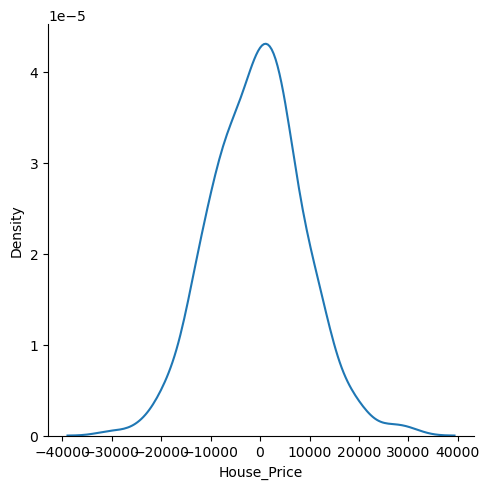

In [238]:
sns.displot(reg_prediction-y_test,kind="kde")
plt.show()

In [ ]:
#As we can see above graph our predicted data is best for use for other house predctions most of ther data is lie centered around zero and display minimal skewness.